FIFA19 Elemzés

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [4]:
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
fifa = df.drop(columns=(['Photo', 'Flag', 'Club Logo', 'Real Face', 'Jersey Number', 'Contract Valid Until', 'Joined', 'Unnamed: 0']))

In [6]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 81 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Special                   18207 non-null  int64  
 10  Preferred Foot            18159 non-null  object 
 11  International Reputation  18159 non-null  float64
 12  Weak Foot                 18159 non-null  float64
 13  Skill Moves               18159 non-null  float64
 14  Work R

In [8]:
fifa.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


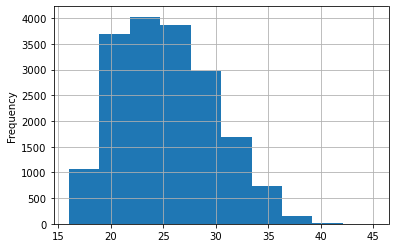

In [9]:
fifa['Age'].plot(kind = 'hist')
plt.grid(True)
plt.show()

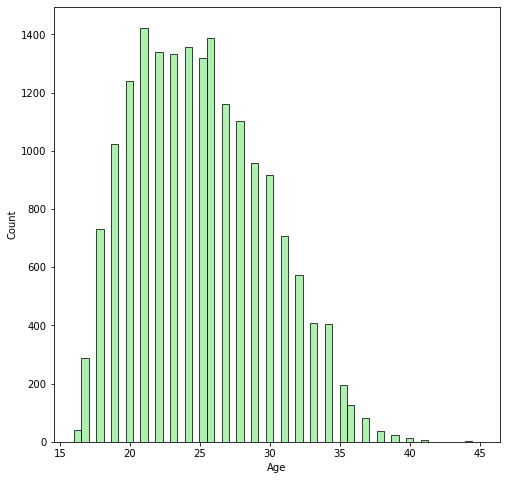

In [10]:
sns.set_palette("colorblind")
plt.figure(figsize=(8,8))
sns.histplot(data=fifa, x="Age",color="lightgreen")
plt.show()

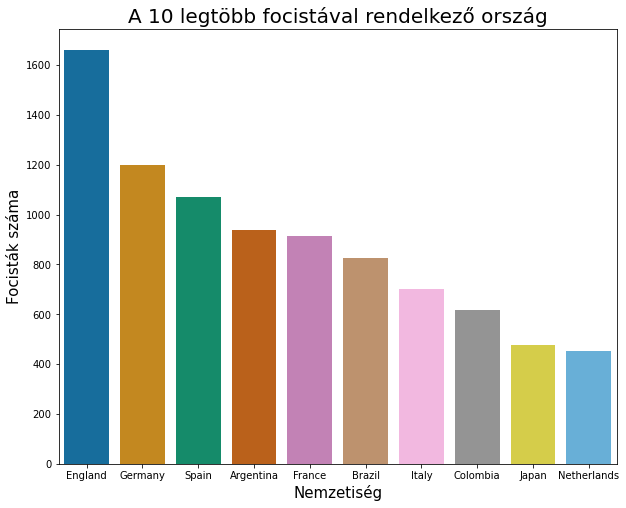

In [11]:
newData = Counter(fifa["Nationality"])
most_countries = newData.most_common(10)

x,y = zip(*most_countries)
x,y = list(x),list(y)
# diagram
plt.figure(figsize=(10,8))
ax= sns.barplot(x=x, y=y) 
plt.xlabel('Nemzetiség', size = 15) 
plt.ylabel('Focisták száma', size=15) 
plt.title('A 10 legtöbb focistával rendelkező ország',size=20) 
plt.show()

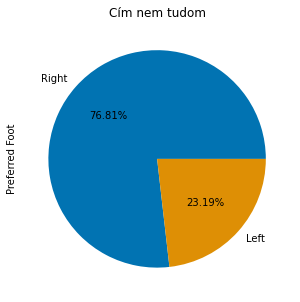

In [12]:
plt.figure(figsize=(5,5))
fifa['Preferred Foot'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Cím nem tudom')
plt.show()

In [13]:
adatok=[]
def atalakit(oszlop):
    for x in oszlop:
        if x[-1] == 'K':
            adat=float(x.replace('K','').replace('€',''))
            adat=adat*1000
            adatok.append(int(adat))
        elif x[-1] == 'M':
            adat=float(x.replace('M','').replace('€',''))
            adat=adat*1000000
            adatok.append(int(adat))
        else:
            adatok.append(0)
            
            
atalakit(fifa['Value'])
fifa['Valueint']=adatok
adatok=[]
atalakit(fifa['Wage'])
fifa['Wageint']=adatok

print(fifa[['Wage','Wageint','Value','Valueint']])

        Wage  Wageint    Value   Valueint
0      €565K   565000  €110.5M  110500000
1      €405K   405000     €77M   77000000
2      €290K   290000  €118.5M  118500000
3      €260K   260000     €72M   72000000
4      €355K   355000    €102M  102000000
...      ...      ...      ...        ...
18202    €1K     1000     €60K      60000
18203    €1K     1000     €60K      60000
18204    €1K     1000     €60K      60000
18205    €1K     1000     €60K      60000
18206    €1K     1000     €60K      60000

[18207 rows x 4 columns]


In [14]:
fifa.corrwith(fifa['Valueint'])

ID                         -0.138194
Age                         0.075022
Overall                     0.627085
Potential                   0.576218
Special                     0.377738
International Reputation    0.653176
Weak Foot                   0.165221
Skill Moves                 0.315651
Crossing                    0.249785
Finishing                   0.256665
HeadingAccuracy             0.184437
ShortPassing                0.327623
Volleys                     0.288243
Dribbling                   0.272004
Curve                       0.287235
FKAccuracy                  0.265773
LongPassing                 0.302175
BallControl                 0.308818
Acceleration                0.170603
SprintSpeed                 0.172677
Agility                     0.194259
Reactions                   0.540552
Balance                     0.113726
ShotPower                   0.281360
Jumping                     0.124515
Stamina                     0.210721
Strength                    0.128924
L

In [15]:
np.corrcoef(fifa.Valueint, fifa.Wageint)

array([[1.        , 0.85844172],
       [0.85844172, 1.        ]])

In [16]:
clubs = fifa.groupby('Club').sum()
clubs.Valueint.sort_values(ascending=False)[:5]

Club
Real Madrid          874425000
FC Barcelona         852600000
Manchester City      786555000
Juventus             704475000
FC Bayern München    679025000
Name: Valueint, dtype: int64

In [17]:
fifa.groupby('Club')['Overall'].sum().sort_values(ascending=False)[:5]
#ezekhez be kéne írni markdownba, hogy mi micsoda

Club
Real Madrid          2582
FC Barcelona         2575
Manchester United    2549
Chelsea              2534
Manchester City      2532
Name: Overall, dtype: int64